## 2일차 

### 환경 변수 지정  

In [76]:
# x, y 값 입력 
data = [[[0,0], [0]],
       [[0,1], [1]],
       [[1,0], [1]],
       [[1,1], [0]]]

In [77]:
def tanh(x, derivate = False):
    if (derivate == True):
        return 1-x**2
    return np.tanh(x)

In [78]:
def sigmoid(x, derivate = False):
    if derivate == True:
        return sigmoid(x) * (1 - sigmoid(x))
    return 1.0 / (1.0 + exp(-x))


### 가중치 함수 

In [79]:
def makeMatrix(i, j, fill = 0.0):
    mat = []
    for i in range(i):
        mat.append([fill] * j)
    return mat

### 신경망 구현 

In [139]:
iterations = 5000
lr = 0.1 
mo = 0.4 

In [140]:
class NeuralNetwork:
    
    # 입력값(num_x), 은닉층초깃값(num_yh), 출력층초깃값(num_yo), 바이어스(bias)
    # 초깃값을 지정
    def __init__(self, num_x, num_yh, num_yo, bias=1):
        
        self.num_x = num_x + bias
        self.num_yh = num_yh
        self.num_yo = num_yo
        
        # 활성화 함수 초깃값
        self.activation_input = [1.0] * self.num_x
        self.activation_hidden = [1.0] * self.num_yh
        self.activation_out = [1.0] * self.num_yo
        
        # 가중치 입력 초깃값
        self.weight_in = makeMatrix(self.num_x, self.num_yh)
        for i in range(self.num_x):
            for j in range(self.num_yh):
                self.weight_in[i][j] = random.random()
                
        # 가중치 출력 초깃값
        self.weight_out = makeMatrix(self.num_yh, self.num_yo)
        for j in range(self.num_yh):
            for k in range(self.num_yo):
                self.weight_out[j][k] = random.random()
                
        # SGD를 위한 초깃값
        self.gradient_in = makeMatrix(self.num_x, self.num_yh)
        self.gradient_out = makeMatrix(self.num_yh, self.num_yo)
        
    def update(self, inputs):
        
        # 입력 레이어의 활성화 함수
        for i in range(self.num_x - 1):
            self.activation_input[i] = inputs[i]
            
        # 은닉층의 활성화 함수
        for j in range(self.num_yh):
            sum=0.0
            for i in range(self.num_x):
                sum = sum + self.activation_input[i] * self.weight_in[i][j]
                self.activation_hidden[j] = tanh(sum, False)
    
        # 출력층의 활성화 함수
        for k in range(self.num_yo):
            sum=0.0
            for j in range(self.num_yh):
                sum = sum + self.activation_hidden[j] * self.weight_out[j][k]
                self.activation_out[k] = tanh(sum, False)
                
        return self.activation_out[:]
                
                
    # Back-propagation 실행
    def backPropagate(self, targets):
        
        # 델타 출력 계산
        output_deltas = [0.0] * self.num_yo
        for k in range(self.num_yo):
            error = targets[k] - self.activation_out[k]
            # 활성화 함수 미분 적용
            output_deltas[k] = tanh(self.activation_out[k], True) * error
        
        # 은닉 노드의 오차함수(Loss Function)
        hidden_deltas = [0.0] * self.num_yh
        for j in range(self.num_yh):
            error = 0.0
            for k in range(self.num_yo):
                error = error + output_deltas[k] * self.weight_out[j][k]
            hidden_deltas[j] = tanh(self.activation_hidden[j], True) * error
        
        # 출력 가중치 업데이트
        for j in range(self.num_yh):
            for k in range(self.num_yo):
                gradient = output_deltas[k] * self.activation_hidden[j]
                v = mo * self.gradient_out[j][k] - lr * gradient
                self.weight_out[j][k] += v
                self.gradient_out[j][k] = gradient
                
        # 입력 가중치 업데이트
        for i in range(self.num_x):
            for j in range(self.num_yh):
                gradient = hidden_deltas[j] * self.activation_input[i]
                v = mo * self.gradient_in[i][j] - lr * gradient
                self.weight_in[i][j] += v
                self.gradient_in[i][j] = gradient
                
        # 최소 제곱법으로 오차 계산
        error = 0.0
        for k in range(len(targets)):
            error = error + 0.5 * (targets[k] - self.activation_out[k])**2
        return error
    
    
    # 학습 실행
    def train(self, patterns):
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.update(inputs)
                error = error + self.backPropagate(targets)
            if i % 100 ==0:
                print('error: %-.5f' % error)
                
    # 결괏값
    def result(self, patterns):
        for p in patterns:
            print('Input: %s, Predict: %s' % (p[0], self.update(p[0])))            

if __name__ == '__main__':  
    
    n = NeuralNetwork(2, 2, 1)
    n.train(data)
    n.result(data)

error: 0.89160
error: 0.38892
error: 0.11761
error: 0.01644
error: 0.00650
error: 0.00365
error: 0.00245
error: 0.00181
error: 0.00143
error: 0.00117
error: 0.00099
error: 0.00086
error: 0.00075
error: 0.00067
error: 0.00060
error: 0.00055
error: 0.00050
error: 0.00046
error: 0.00043
error: 0.00040
error: 0.00038
error: 0.00035
error: 0.00033
error: 0.00032
error: 0.00030
error: 0.00028
error: 0.00027
error: 0.00026
error: 0.00025
error: 0.00024
error: 0.00023
error: 0.00022
error: 0.00021
error: 0.00020
error: 0.00020
error: 0.00019
error: 0.00018
error: 0.00018
error: 0.00017
error: 0.00017
error: 0.00016
error: 0.00016
error: 0.00015
error: 0.00015
error: 0.00015
error: 0.00014
error: 0.00014
error: 0.00014
error: 0.00013
error: 0.00013
Input: [0, 0], Predict: [0.0006481742149449371]
Input: [0, 1], Predict: [0.9888601524209748]
Input: [1, 0], Predict: [0.9888881874844844]
Input: [1, 1], Predict: [0.002166564256951564]


## XOR Problem - TensorFlow2 Keras 구현 

In [202]:
import tensorflow as tf 
from tensorflow import keras

### 1-tf.keras 연습 

In [203]:
# XOR 데이터 입력 

x = np.array([[1,1],
              [1,0],
              [0,1],
              [1,1]])
y = np.array([[0],
            [1],
            [1],
            [0]])

In [204]:
# Layer 생성 
model = tf.keras.Sequential([
    # Hidden Layer 2개 
    tf.keras.layers.Dense(2, activation='relu', input_shape=(2,)),
    # Output Layer 
    tf.keras.layers.Dense(1, activation='relu')
])

In [205]:
# Model Build 
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.1),
             loss = 'mse')

In [206]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [207]:
history = model.fit(x, y, epochs = 2000, batch_size = 16)

Train on 4 samples
Epoch 1/2000
4/4 [==============================] - 1s 143ms/sample - loss: 0.4366
Epoch 2/2000
4/4 [==============================] - 0s 394us/sample - loss: 0.4130
Epoch 3/2000
4/4 [==============================] - 0s 957us/sample - loss: 0.3932
Epoch 4/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.3755
Epoch 5/2000
4/4 [==============================] - 0s 578us/sample - loss: 0.3594
Epoch 6/2000
4/4 [==============================] - 0s 692us/sample - loss: 0.3446
Epoch 7/2000
4/4 [==============================] - 0s 883us/sample - loss: 0.3307
Epoch 8/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.3178
Epoch 9/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.3057
Epoch 10/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2943
Epoch 11/2000
4/4 [==============================] - 0s 687us/sample - loss: 0.2835
Epoch 12/2000
4/4 [==============================] - 0s 1ms/sample - loss:

Epoch 99/2000
4/4 [==============================] - 0s 439us/sample - loss: 0.0643
Epoch 100/2000
4/4 [==============================] - 0s 599us/sample - loss: 0.0623
Epoch 101/2000
4/4 [==============================] - 0s 644us/sample - loss: 0.0602
Epoch 102/2000
4/4 [==============================] - 0s 424us/sample - loss: 0.0582
Epoch 103/2000
4/4 [==============================] - 0s 707us/sample - loss: 0.0563
Epoch 104/2000
4/4 [==============================] - 0s 533us/sample - loss: 0.0543
Epoch 105/2000
4/4 [==============================] - 0s 844us/sample - loss: 0.0523
Epoch 106/2000
4/4 [==============================] - 0s 767us/sample - loss: 0.0504
Epoch 107/2000
4/4 [==============================] - 0s 551us/sample - loss: 0.0485
Epoch 108/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0466
Epoch 109/2000
4/4 [==============================] - 0s 898us/sample - loss: 0.0448
Epoch 110/2000
4/4 [==============================] - 0s 719us/sampl

Epoch 195/2000
4/4 [==============================] - 0s 673us/sample - loss: 1.0883e-04
Epoch 196/2000
4/4 [==============================] - 0s 569us/sample - loss: 1.0002e-04
Epoch 197/2000
4/4 [==============================] - 0s 829us/sample - loss: 9.1914e-05
Epoch 198/2000
4/4 [==============================] - 0s 364us/sample - loss: 8.4458e-05
Epoch 199/2000
4/4 [==============================] - 0s 370us/sample - loss: 7.7600e-05
Epoch 200/2000
4/4 [==============================] - 0s 827us/sample - loss: 7.1293e-05
Epoch 201/2000
4/4 [==============================] - 0s 862us/sample - loss: 6.5495e-05
Epoch 202/2000
4/4 [==============================] - 0s 535us/sample - loss: 6.0164e-05
Epoch 203/2000
4/4 [==============================] - 0s 386us/sample - loss: 5.5262e-05
Epoch 204/2000
4/4 [==============================] - 0s 589us/sample - loss: 5.0757e-05
Epoch 205/2000
4/4 [==============================] - 0s 654us/sample - loss: 4.6616e-05
Epoch 206/2000
4/4 [=

Epoch 288/2000
4/4 [==============================] - 0s 512us/sample - loss: 3.6513e-08
Epoch 289/2000
4/4 [==============================] - 0s 769us/sample - loss: 3.3477e-08
Epoch 290/2000
4/4 [==============================] - 0s 360us/sample - loss: 3.0707e-08
Epoch 291/2000
4/4 [==============================] - 0s 595us/sample - loss: 2.8151e-08
Epoch 292/2000
4/4 [==============================] - 0s 928us/sample - loss: 2.5836e-08
Epoch 293/2000
4/4 [==============================] - 0s 2ms/sample - loss: 2.3686e-08
Epoch 294/2000
4/4 [==============================] - 0s 410us/sample - loss: 2.1722e-08
Epoch 295/2000
4/4 [==============================] - 0s 2ms/sample - loss: 1.9909e-08
Epoch 296/2000
4/4 [==============================] - 0s 1ms/sample - loss: 1.8272e-08
Epoch 297/2000
4/4 [==============================] - 0s 1ms/sample - loss: 1.6755e-08
Epoch 298/2000
4/4 [==============================] - 0s 2ms/sample - loss: 1.5374e-08
Epoch 299/2000
4/4 [===========

Epoch 381/2000
4/4 [==============================] - 0s 581us/sample - loss: 1.2294e-11
Epoch 382/2000
4/4 [==============================] - 0s 536us/sample - loss: 1.1554e-11
Epoch 383/2000
4/4 [==============================] - 0s 572us/sample - loss: 1.0339e-11
Epoch 384/2000
4/4 [==============================] - 0s 528us/sample - loss: 9.9210e-12
Epoch 385/2000
4/4 [==============================] - 0s 852us/sample - loss: 8.9102e-12
Epoch 386/2000
4/4 [==============================] - 0s 450us/sample - loss: 8.2530e-12
Epoch 387/2000
4/4 [==============================] - 0s 610us/sample - loss: 7.4225e-12
Epoch 388/2000
4/4 [==============================] - 0s 555us/sample - loss: 6.8221e-12
Epoch 389/2000
4/4 [==============================] - 0s 740us/sample - loss: 6.0050e-12
Epoch 390/2000
4/4 [==============================] - 0s 899us/sample - loss: 5.6737e-12
Epoch 391/2000
4/4 [==============================] - 0s 398us/sample - loss: 5.2953e-12
Epoch 392/2000
4/4 [=

Epoch 474/2000
4/4 [==============================] - 0s 504us/sample - loss: 2.0606e-13
Epoch 475/2000
4/4 [==============================] - 0s 560us/sample - loss: 2.0606e-13
Epoch 476/2000
4/4 [==============================] - 0s 406us/sample - loss: 2.0606e-13
Epoch 477/2000
4/4 [==============================] - 0s 530us/sample - loss: 2.0606e-13
Epoch 478/2000
4/4 [==============================] - 0s 460us/sample - loss: 2.0606e-13
Epoch 479/2000
4/4 [==============================] - 0s 541us/sample - loss: 2.0606e-13
Epoch 480/2000
4/4 [==============================] - 0s 501us/sample - loss: 2.0606e-13
Epoch 481/2000
4/4 [==============================] - 0s 410us/sample - loss: 2.0606e-13
Epoch 482/2000
4/4 [==============================] - 0s 525us/sample - loss: 2.0606e-13
Epoch 483/2000
4/4 [==============================] - 0s 444us/sample - loss: 2.0606e-13
Epoch 484/2000
4/4 [==============================] - 0s 383us/sample - loss: 2.0606e-13
Epoch 485/2000
4/4 [=

4/4 [==============================] - 0s 380us/sample - loss: 2.0606e-13
Epoch 567/2000
4/4 [==============================] - 0s 487us/sample - loss: 2.0606e-13
Epoch 568/2000
4/4 [==============================] - 0s 619us/sample - loss: 2.0606e-13
Epoch 569/2000
4/4 [==============================] - 0s 877us/sample - loss: 2.0606e-13
Epoch 570/2000
4/4 [==============================] - 0s 383us/sample - loss: 2.0606e-13
Epoch 571/2000
4/4 [==============================] - 0s 604us/sample - loss: 2.0606e-13
Epoch 572/2000
4/4 [==============================] - 0s 585us/sample - loss: 2.0606e-13
Epoch 573/2000
4/4 [==============================] - 0s 840us/sample - loss: 2.0606e-13
Epoch 574/2000
4/4 [==============================] - 0s 429us/sample - loss: 2.0606e-13
Epoch 575/2000
4/4 [==============================] - 0s 364us/sample - loss: 2.0606e-13
Epoch 576/2000
4/4 [==============================] - 0s 511us/sample - loss: 2.0606e-13
Epoch 577/2000
4/4 [================

Epoch 659/2000
4/4 [==============================] - 0s 462us/sample - loss: 2.0606e-13
Epoch 660/2000
4/4 [==============================] - 0s 576us/sample - loss: 2.0606e-13
Epoch 661/2000
4/4 [==============================] - 0s 847us/sample - loss: 2.0606e-13
Epoch 662/2000
4/4 [==============================] - 0s 616us/sample - loss: 2.0606e-13
Epoch 663/2000
4/4 [==============================] - 0s 533us/sample - loss: 2.0606e-13
Epoch 664/2000
4/4 [==============================] - 0s 711us/sample - loss: 2.0606e-13
Epoch 665/2000
4/4 [==============================] - 0s 588us/sample - loss: 2.0606e-13
Epoch 666/2000
4/4 [==============================] - 0s 717us/sample - loss: 2.0606e-13
Epoch 667/2000
4/4 [==============================] - 0s 406us/sample - loss: 2.0606e-13
Epoch 668/2000
4/4 [==============================] - 0s 466us/sample - loss: 2.0606e-13
Epoch 669/2000
4/4 [==============================] - 0s 496us/sample - loss: 2.0606e-13
Epoch 670/2000
4/4 [=

Epoch 751/2000
4/4 [==============================] - 0s 536us/sample - loss: 2.0606e-13
Epoch 752/2000
4/4 [==============================] - 0s 462us/sample - loss: 2.0606e-13
Epoch 753/2000
4/4 [==============================] - 0s 496us/sample - loss: 2.0606e-13
Epoch 754/2000
4/4 [==============================] - 0s 615us/sample - loss: 2.0606e-13
Epoch 755/2000
4/4 [==============================] - 0s 435us/sample - loss: 2.0606e-13
Epoch 756/2000
4/4 [==============================] - 0s 635us/sample - loss: 2.0606e-13
Epoch 757/2000
4/4 [==============================] - 0s 465us/sample - loss: 2.0606e-13
Epoch 758/2000
4/4 [==============================] - 0s 455us/sample - loss: 2.0606e-13
Epoch 759/2000
4/4 [==============================] - 0s 616us/sample - loss: 2.0606e-13
Epoch 760/2000
4/4 [==============================] - 0s 502us/sample - loss: 2.0606e-13
Epoch 761/2000
4/4 [==============================] - 0s 474us/sample - loss: 2.0606e-13
Epoch 762/2000
4/4 [=

Epoch 844/2000
4/4 [==============================] - 0s 528us/sample - loss: 2.0606e-13
Epoch 845/2000
4/4 [==============================] - 0s 429us/sample - loss: 2.0606e-13
Epoch 846/2000
4/4 [==============================] - 0s 381us/sample - loss: 2.0606e-13
Epoch 847/2000
4/4 [==============================] - 0s 315us/sample - loss: 2.0606e-13
Epoch 848/2000
4/4 [==============================] - 0s 486us/sample - loss: 2.0606e-13
Epoch 849/2000
4/4 [==============================] - 0s 498us/sample - loss: 2.0606e-13
Epoch 850/2000
4/4 [==============================] - 0s 430us/sample - loss: 2.0606e-13
Epoch 851/2000
4/4 [==============================] - 0s 617us/sample - loss: 2.0606e-13
Epoch 852/2000
4/4 [==============================] - 0s 898us/sample - loss: 2.0606e-13
Epoch 853/2000
4/4 [==============================] - 0s 524us/sample - loss: 2.0606e-13
Epoch 854/2000
4/4 [==============================] - 0s 470us/sample - loss: 2.0606e-13
Epoch 855/2000
4/4 [=

4/4 [==============================] - 0s 662us/sample - loss: 2.0606e-13
Epoch 937/2000
4/4 [==============================] - 0s 694us/sample - loss: 2.0606e-13
Epoch 938/2000
4/4 [==============================] - 0s 872us/sample - loss: 2.0606e-13
Epoch 939/2000
4/4 [==============================] - 0s 764us/sample - loss: 2.0606e-13
Epoch 940/2000
4/4 [==============================] - 0s 1ms/sample - loss: 2.0606e-13
Epoch 941/2000
4/4 [==============================] - 0s 762us/sample - loss: 2.0606e-13
Epoch 942/2000
4/4 [==============================] - 0s 473us/sample - loss: 2.0606e-13
Epoch 943/2000
4/4 [==============================] - 0s 468us/sample - loss: 2.0606e-13
Epoch 944/2000
4/4 [==============================] - 0s 582us/sample - loss: 2.0606e-13
Epoch 945/2000
4/4 [==============================] - 0s 625us/sample - loss: 2.0606e-13
Epoch 946/2000
4/4 [==============================] - 0s 425us/sample - loss: 2.0606e-13
Epoch 947/2000
4/4 [==================

Epoch 1028/2000
4/4 [==============================] - 0s 515us/sample - loss: 2.0606e-13
Epoch 1029/2000
4/4 [==============================] - 0s 660us/sample - loss: 2.0606e-13
Epoch 1030/2000
4/4 [==============================] - 0s 599us/sample - loss: 2.0606e-13
Epoch 1031/2000
4/4 [==============================] - 0s 594us/sample - loss: 2.0606e-13
Epoch 1032/2000
4/4 [==============================] - 0s 687us/sample - loss: 2.0606e-13
Epoch 1033/2000
4/4 [==============================] - 0s 984us/sample - loss: 2.0606e-13
Epoch 1034/2000
4/4 [==============================] - 0s 1ms/sample - loss: 2.0606e-13
Epoch 1035/2000
4/4 [==============================] - 0s 1ms/sample - loss: 2.0606e-13
Epoch 1036/2000
4/4 [==============================] - 0s 654us/sample - loss: 2.0606e-13
Epoch 1037/2000
4/4 [==============================] - 0s 878us/sample - loss: 2.0606e-13
Epoch 1038/2000
4/4 [==============================] - 0s 475us/sample - loss: 2.0606e-13
Epoch 1039/200

Epoch 1120/2000
4/4 [==============================] - 0s 620us/sample - loss: 2.0606e-13
Epoch 1121/2000
4/4 [==============================] - 0s 702us/sample - loss: 2.0606e-13
Epoch 1122/2000
4/4 [==============================] - 0s 483us/sample - loss: 2.0606e-13
Epoch 1123/2000
4/4 [==============================] - 0s 711us/sample - loss: 2.0606e-13
Epoch 1124/2000
4/4 [==============================] - 0s 689us/sample - loss: 2.0606e-13
Epoch 1125/2000
4/4 [==============================] - 0s 1ms/sample - loss: 2.0606e-13
Epoch 1126/2000
4/4 [==============================] - 0s 830us/sample - loss: 2.0606e-13
Epoch 1127/2000
4/4 [==============================] - 0s 577us/sample - loss: 2.0606e-13
Epoch 1128/2000
4/4 [==============================] - 0s 601us/sample - loss: 2.0606e-13
Epoch 1129/2000
4/4 [==============================] - 0s 545us/sample - loss: 2.0606e-13
Epoch 1130/2000
4/4 [==============================] - 0s 651us/sample - loss: 2.0606e-13
Epoch 1131/2

4/4 [==============================] - 0s 896us/sample - loss: 2.0606e-13
Epoch 1212/2000
4/4 [==============================] - 0s 468us/sample - loss: 2.0606e-13
Epoch 1213/2000
4/4 [==============================] - 0s 482us/sample - loss: 2.0606e-13
Epoch 1214/2000
4/4 [==============================] - 0s 890us/sample - loss: 2.0606e-13
Epoch 1215/2000
4/4 [==============================] - 0s 521us/sample - loss: 2.0606e-13
Epoch 1216/2000
4/4 [==============================] - 0s 425us/sample - loss: 2.0606e-13
Epoch 1217/2000
4/4 [==============================] - 0s 463us/sample - loss: 2.0606e-13
Epoch 1218/2000
4/4 [==============================] - 0s 891us/sample - loss: 2.0606e-13
Epoch 1219/2000
4/4 [==============================] - 0s 540us/sample - loss: 2.0606e-13
Epoch 1220/2000
4/4 [==============================] - 0s 511us/sample - loss: 2.0606e-13
Epoch 1221/2000
4/4 [==============================] - 0s 807us/sample - loss: 2.0606e-13
Epoch 1222/2000
4/4 [=====

Epoch 1303/2000
4/4 [==============================] - 0s 529us/sample - loss: 2.0606e-13
Epoch 1304/2000
4/4 [==============================] - 0s 382us/sample - loss: 2.0606e-13
Epoch 1305/2000
4/4 [==============================] - 0s 603us/sample - loss: 2.0606e-13
Epoch 1306/2000
4/4 [==============================] - 0s 634us/sample - loss: 2.0606e-13
Epoch 1307/2000
4/4 [==============================] - 0s 538us/sample - loss: 2.0606e-13
Epoch 1308/2000
4/4 [==============================] - 0s 679us/sample - loss: 2.0606e-13
Epoch 1309/2000
4/4 [==============================] - 0s 681us/sample - loss: 2.0606e-13
Epoch 1310/2000
4/4 [==============================] - 0s 557us/sample - loss: 2.0606e-13
Epoch 1311/2000
4/4 [==============================] - 0s 363us/sample - loss: 2.0606e-13
Epoch 1312/2000
4/4 [==============================] - 0s 583us/sample - loss: 2.0606e-13
Epoch 1313/2000
4/4 [==============================] - 0s 707us/sample - loss: 2.0606e-13
Epoch 1314

Epoch 1395/2000
4/4 [==============================] - 0s 1ms/sample - loss: 2.0606e-13
Epoch 1396/2000
4/4 [==============================] - 0s 697us/sample - loss: 2.0606e-13
Epoch 1397/2000
4/4 [==============================] - 0s 507us/sample - loss: 2.0606e-13
Epoch 1398/2000
4/4 [==============================] - 0s 812us/sample - loss: 2.0606e-13
Epoch 1399/2000
4/4 [==============================] - 0s 679us/sample - loss: 2.0606e-13
Epoch 1400/2000
4/4 [==============================] - 0s 742us/sample - loss: 2.0606e-13
Epoch 1401/2000
4/4 [==============================] - 0s 469us/sample - loss: 2.0606e-13
Epoch 1402/2000
4/4 [==============================] - 0s 827us/sample - loss: 2.0606e-13
Epoch 1403/2000
4/4 [==============================] - 0s 901us/sample - loss: 2.0606e-13
Epoch 1404/2000
4/4 [==============================] - 0s 616us/sample - loss: 2.0606e-13
Epoch 1405/2000
4/4 [==============================] - 0s 525us/sample - loss: 2.0606e-13
Epoch 1406/2

4/4 [==============================] - 0s 765us/sample - loss: 2.0606e-13
Epoch 1487/2000
4/4 [==============================] - 0s 770us/sample - loss: 2.0606e-13
Epoch 1488/2000
4/4 [==============================] - 0s 558us/sample - loss: 2.0606e-13
Epoch 1489/2000
4/4 [==============================] - 0s 538us/sample - loss: 2.0606e-13
Epoch 1490/2000
4/4 [==============================] - 0s 521us/sample - loss: 2.0606e-13
Epoch 1491/2000
4/4 [==============================] - 0s 591us/sample - loss: 2.0606e-13
Epoch 1492/2000
4/4 [==============================] - 0s 584us/sample - loss: 2.0606e-13
Epoch 1493/2000
4/4 [==============================] - 0s 630us/sample - loss: 2.0606e-13
Epoch 1494/2000
4/4 [==============================] - 0s 574us/sample - loss: 2.0606e-13
Epoch 1495/2000
4/4 [==============================] - 0s 568us/sample - loss: 2.0606e-13
Epoch 1496/2000
4/4 [==============================] - 0s 660us/sample - loss: 2.0606e-13
Epoch 1497/2000
4/4 [=====

Epoch 1578/2000
4/4 [==============================] - 0s 387us/sample - loss: 2.0606e-13
Epoch 1579/2000
4/4 [==============================] - 0s 633us/sample - loss: 2.0606e-13
Epoch 1580/2000
4/4 [==============================] - 0s 572us/sample - loss: 2.0606e-13
Epoch 1581/2000
4/4 [==============================] - 0s 690us/sample - loss: 2.0606e-13
Epoch 1582/2000
4/4 [==============================] - 0s 412us/sample - loss: 2.0606e-13
Epoch 1583/2000
4/4 [==============================] - 0s 499us/sample - loss: 2.0606e-13
Epoch 1584/2000
4/4 [==============================] - 0s 565us/sample - loss: 2.0606e-13
Epoch 1585/2000
4/4 [==============================] - 0s 425us/sample - loss: 2.0606e-13
Epoch 1586/2000
4/4 [==============================] - 0s 470us/sample - loss: 2.0606e-13
Epoch 1587/2000
4/4 [==============================] - 0s 775us/sample - loss: 2.0606e-13
Epoch 1588/2000
4/4 [==============================] - 0s 464us/sample - loss: 2.0606e-13
Epoch 1589

Epoch 1670/2000
4/4 [==============================] - 0s 454us/sample - loss: 2.0606e-13
Epoch 1671/2000
4/4 [==============================] - 0s 522us/sample - loss: 2.0606e-13
Epoch 1672/2000
4/4 [==============================] - 0s 584us/sample - loss: 2.0606e-13
Epoch 1673/2000
4/4 [==============================] - 0s 386us/sample - loss: 2.0606e-13
Epoch 1674/2000
4/4 [==============================] - 0s 472us/sample - loss: 2.0606e-13
Epoch 1675/2000
4/4 [==============================] - 0s 511us/sample - loss: 2.0606e-13
Epoch 1676/2000
4/4 [==============================] - 0s 487us/sample - loss: 2.0606e-13
Epoch 1677/2000
4/4 [==============================] - 0s 842us/sample - loss: 2.0606e-13
Epoch 1678/2000
4/4 [==============================] - 0s 554us/sample - loss: 2.0606e-13
Epoch 1679/2000
4/4 [==============================] - 0s 379us/sample - loss: 2.0606e-13
Epoch 1680/2000
4/4 [==============================] - 0s 476us/sample - loss: 2.0606e-13
Epoch 1681

Epoch 1762/2000
4/4 [==============================] - 0s 590us/sample - loss: 2.0606e-13
Epoch 1763/2000
4/4 [==============================] - 0s 559us/sample - loss: 2.0606e-13
Epoch 1764/2000
4/4 [==============================] - 0s 585us/sample - loss: 2.0606e-13
Epoch 1765/2000
4/4 [==============================] - 0s 1ms/sample - loss: 2.0606e-13
Epoch 1766/2000
4/4 [==============================] - 0s 712us/sample - loss: 2.0606e-13
Epoch 1767/2000
4/4 [==============================] - 0s 510us/sample - loss: 2.0606e-13
Epoch 1768/2000
4/4 [==============================] - 0s 528us/sample - loss: 2.0606e-13
Epoch 1769/2000
4/4 [==============================] - 0s 536us/sample - loss: 2.0606e-13
Epoch 1770/2000
4/4 [==============================] - 0s 394us/sample - loss: 2.0606e-13
Epoch 1771/2000
4/4 [==============================] - 0s 637us/sample - loss: 2.0606e-13
Epoch 1772/2000
4/4 [==============================] - 0s 683us/sample - loss: 2.0606e-13
Epoch 1773/2

Epoch 1854/2000
4/4 [==============================] - 0s 435us/sample - loss: 2.0606e-13
Epoch 1855/2000
4/4 [==============================] - 0s 342us/sample - loss: 2.0606e-13
Epoch 1856/2000
4/4 [==============================] - 0s 634us/sample - loss: 2.0606e-13
Epoch 1857/2000
4/4 [==============================] - 0s 583us/sample - loss: 2.0606e-13
Epoch 1858/2000
4/4 [==============================] - 0s 503us/sample - loss: 2.0606e-13
Epoch 1859/2000
4/4 [==============================] - 0s 645us/sample - loss: 2.0606e-13
Epoch 1860/2000
4/4 [==============================] - 0s 312us/sample - loss: 2.0606e-13
Epoch 1861/2000
4/4 [==============================] - 0s 562us/sample - loss: 2.0606e-13
Epoch 1862/2000
4/4 [==============================] - 0s 421us/sample - loss: 2.0606e-13
Epoch 1863/2000
4/4 [==============================] - 0s 472us/sample - loss: 2.0606e-13
Epoch 1864/2000
4/4 [==============================] - 0s 422us/sample - loss: 2.0606e-13
Epoch 1865

Epoch 1946/2000
4/4 [==============================] - 0s 572us/sample - loss: 2.0606e-13
Epoch 1947/2000
4/4 [==============================] - 0s 1ms/sample - loss: 2.0606e-13
Epoch 1948/2000
4/4 [==============================] - 0s 1ms/sample - loss: 2.0606e-13
Epoch 1949/2000
4/4 [==============================] - 0s 736us/sample - loss: 2.0606e-13
Epoch 1950/2000
4/4 [==============================] - 0s 1ms/sample - loss: 2.0606e-13
Epoch 1951/2000
4/4 [==============================] - 0s 1ms/sample - loss: 2.0606e-13
Epoch 1952/2000
4/4 [==============================] - 0s 862us/sample - loss: 2.0606e-13
Epoch 1953/2000
4/4 [==============================] - 0s 704us/sample - loss: 2.0606e-13
Epoch 1954/2000
4/4 [==============================] - 0s 584us/sample - loss: 2.0606e-13
Epoch 1955/2000
4/4 [==============================] - 0s 1ms/sample - loss: 2.0606e-13
Epoch 1956/2000
4/4 [==============================] - 0s 1ms/sample - loss: 2.0606e-13
Epoch 1957/2000
4/4 [=

In [208]:
model.predict(x)

array([[3.5762787e-07],
       [9.9999928e-01],
       [9.9999976e-01],
       [3.5762787e-07]], dtype=float32)

In [209]:
model.weights

# 첫번째 레이어 
# array([[-2.3691552,  2.8486173],
#         [-2.4038506,  2.8164892]],

[<tf.Variable 'dense_12/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 0.42873898, -1.1216227 ],
        [ 1.1096593 ,  0.9092828 ]], dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(2,) dtype=float32, numpy=array([-0.26432136,  0.16792913], dtype=float32)>,
 <tf.Variable 'dense_13/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-0.9011765],
        [ 0.5696464]], dtype=float32)>,
 <tf.Variable 'dense_13/bias:0' shape=(1,) dtype=float32, numpy=array([1.1481686], dtype=float32)>]

In [210]:
history.history.keys()

dict_keys(['loss'])

TypeError: 'str' object is not callable

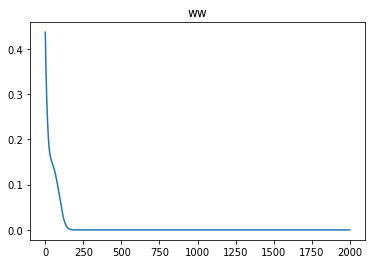

In [211]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('ww')
